# Question (2)
Consider a 2D problem with 3 classes where each class is described by the following priors,
mean vectors, and covariance matrices. (25)
P(C1) = 0.2
µ1 = [3 2 ]𝑇
P(C2) = 0.7
µ2 = [5 4 ]𝑇
P(C3) = 0.1
µ3 = [2 5 ]𝑇
∑1 = [−11 −21] ∑2 = [−11 −21] ∑3 = [0 0..5 5 03.5]

# Question 2 (a)
Create a program to plot the decision boundaries for a ML and MAP classifier. Plot
the means and first standard deviation contours for each class. Discuss the
differences between the decision boundaries.

MAP classifier 
G(x) = -1/2*(x-mean).T*(COV.inverse)*(x-mean) - 1/2*log(|COV|) + log(P(C))

ML classifier 
G(x) = -1/2*(x-mean).T*(COV.inverse)*(x-mean) - 1/2*log(|COV|)

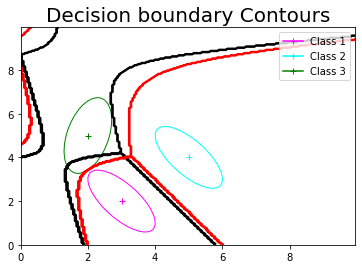

In [6]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

mean_a = [3, 2]
cov_a  = [[1, -1], [-1, 2]]
prob_a = 0.2

mean_b = [5, 4]
cov_b  = [[1, -1], [-1, 2]]
prob_b = 0.7

mean_c = [2, 5]
cov_c  = [[0.5, 0.5], [0.5, 3]]
prob_c = 0.1

x  = np.arange(0, 10, 0.05).tolist()
y  = np.arange(0, 10, 0.05).tolist()
x_coord, y_coord = np.meshgrid(x,y)
data_plot = np.c_[x_coord.ravel(), y_coord.ravel()]


################################Plotting decision boundaries#########################################
cov_inv_a = np.linalg.inv(cov_a)
cov_inv_b = np.linalg.inv(cov_b)
cov_inv_c = np.linalg.inv(cov_c)

cov_mod_a  = np.linalg.det(cov_a)
cov_mod_b  = np.linalg.det(cov_b)
cov_mod_c  = np.linalg.det(cov_c)

log_prob_a = np.log(prob_a)
log_prob_b = np.log(prob_b)
log_prob_c = np.log(prob_c)

map_class_list = []
ml_class_list = []

for i in data_plot:
    map_a = -1/2*np.dot((i-mean_a).T, np.dot(cov_inv_a , (i-mean_a))) - 1/2*np.log(cov_mod_a) + log_prob_a
    map_b = -1/2*np.dot((i-mean_b).T, np.dot(cov_inv_b , (i-mean_b))) - 1/2*np.log(cov_mod_b) + log_prob_b
    map_c = -1/2*np.dot((i-mean_c).T, np.dot(cov_inv_c , (i-mean_c))) - 1/2*np.log(cov_mod_c) + log_prob_c

    m = [map_a, map_b, map_c]
    map_class = np.argmax(m)
    map_class_list.append(map_class)

    ml_a = -1/2*np.dot((i-mean_a).T, np.dot(cov_inv_a , (i-mean_a))) - 1/2*np.log(cov_mod_a) 
    ml_b = -1/2*np.dot((i-mean_b).T, np.dot(cov_inv_b , (i-mean_b))) - 1/2*np.log(cov_mod_b) 
    ml_c = -1/2*np.dot((i-mean_c).T, np.dot(cov_inv_c , (i-mean_c))) - 1/2*np.log(cov_mod_c) 

    ml_class = np.argmax([ml_a, ml_b, ml_c])
    ml_class_list.append(ml_class)

map_class_list =  np.reshape(map_class_list, x_coord.shape)
plt.contour(x_coord, y_coord, map_class_list, levels=4, colors='black', linewidths=2, label="MAP decision boundary")

ml_class_list =  np.reshape(ml_class_list, x_coord.shape)
plt.contour(x_coord, y_coord, ml_class_list, levels=4, colors='red', linewidths=2, label="ML decision boundary")
#plt.co(loc='bottom right')
##############################################Ploting Means##################################################
plt.plot(mean_a[0], mean_a[1], marker='+', color='magenta',   label="Class 1")
plt.plot(mean_b[0], mean_b[1], marker='+', color='cyan', label="Class 2")
plt.plot(mean_c[0], mean_c[1], marker='+', color='green', label="Class 3")

######################################## Plotting first standard deviation contour ###########################
#plotting standard dev plot for class A
mean_a = [3, 2]
cov_a  = [[1, -1], [-1, 2]]

eigen_val, eigen_vec = np.linalg.eig(cov_a)
rad = np.sqrt(eigen_val)
theta = np.degrees(np.arctan2(*eigen_vec[:,0][::-1]))

ax1 = plt.subplot(111)
w = 2 * np.sqrt(eigen_val[0])
h = 2 * np.sqrt(eigen_val[1])

ell = Ellipse(xy=(3,2),width=w, height=h, angle=theta, color='magenta')
ell.set_facecolor('none')
ax1.add_artist(ell)

#plotting standard dev plot for class B
mean_b = [5, 4]
cov_b  = [[1, -1], [-1, 2]]

eigen_val, eigen_vec = np.linalg.eig(cov_b)
rad = np.sqrt(eigen_val)
theta = np.degrees(np.arctan2(*eigen_vec[:,0][::-1]))
w = 2 * np.sqrt(eigen_val[0])
h = 2 * np.sqrt(eigen_val[1])

ell = Ellipse(xy=(5,4),width=w, height=h, angle=theta, color='cyan')
ell.set_facecolor('none')
ax1.add_artist(ell)

#plotting standard dev plot for class C
mean_c = [2, 5]
cov_c  = [[0.5, 0.5], [0.5, 3]]
eigen_val, eigen_vec = np.linalg.eig(cov_c)
rad = np.sqrt(eigen_val)
theta = np.degrees(np.arctan2(*eigen_vec[:,0][::-1]))
w = 2 * np.sqrt(eigen_val[0])
h = 2 * np.sqrt(eigen_val[1])

ell = Ellipse(xy=(2,5),width=w, height=h, angle=theta, color='green')
ell.set_facecolor('none')
ax1.add_artist(ell)
plt.title("Decision boundary Contours", Fontsize=20)
plt.legend(loc='bottom right')
plt.savefig('q2_decision_boundary.jpg')
plt.show()



# Question 3(b)
Generate a 3000 sample dataset using the prior probabilities of each class. For both
the ML and MAP classifiers: classify the generated dataset, calculate a confusion
matrix, and calculate the experimental P(ε). Discuss the results.














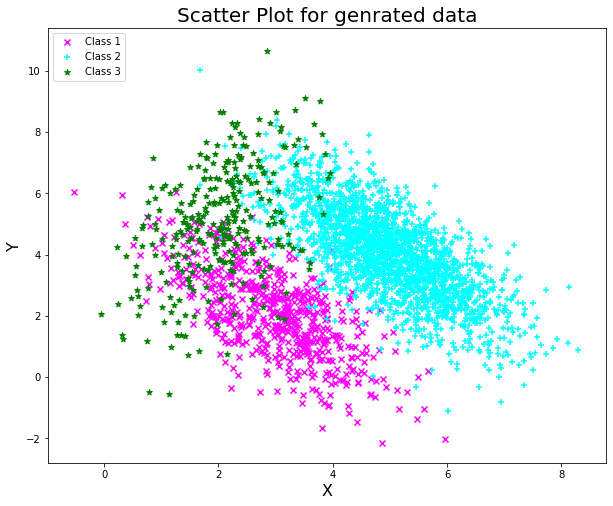

In [12]:
#prior probability of class 1 is 0.2 class 2 0.7 and class 3 0.1 
# so the sample distrubutuion will also change 

N = 300*2
#Genrating data samples for class C1
mean_a = [3, 2]
cov_a  = [[1, -1], [-1, 2]] 
#data_b = np.random.multivariate_normal(mean_b, cov_b, N)
L = np.linalg.cholesky(cov_a)
uncorrelated = np.random.standard_normal((2,N))
data_at = np.dot(L,uncorrelated) + np.array(mean_a).reshape(2,1)
data_a  = data_at.transpose()
fig = plt.figure(figsize=(10,8))
plt.title("Scatter Plot for genrated data", Fontsize=20)
plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16)
plt.scatter(data_a[:,0], data_a[:,1], c='magenta', marker='x', label="Class 1")

N = 300*7
#Genrating data samples for class C1
mean_b = [5, 4]
cov_b  = [[1, -1], [-1, 2]] 
#data_b = np.random.multivariate_normal(mean_b, cov_b, N)
L = np.linalg.cholesky(cov_b)
uncorrelated = np.random.standard_normal((2,N))
data_bt = np.dot(L,uncorrelated) + np.array(mean_b).reshape(2,1)
data_b  = data_bt.transpose()
#ploting class B
plt.scatter(data_b[:,0], data_b[:,1], c='cyan', marker='+', label="Class 2")

N = 300*1
#Genrating data samples for class C1
mean_c = [2, 5]
cov_c  = [[.5, .5], [.5, 3]] 
#data_b = np.random.multivariate_normal(mean_b, cov_b, N)
L = np.linalg.cholesky(cov_c)
uncorrelated = np.random.standard_normal((2,N))
data_ct = np.dot(L,uncorrelated) + np.array(mean_c).reshape(2,1)
data_c  = data_ct.transpose()
#ploting class B
plt.scatter(data_c[:,0], data_c[:,1], c='green', marker='*', label="Class 3")
plt.legend(loc='upper left')
fig.savefig('q2_sp.jpg')
plt.show()

In [13]:
#Calculating the confusion Matrix
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score

mean_a = [3, 2]
cov_a  = [[1, -1], [-1, 2]]
prob_a = 0.2

mean_b = [5, 4]
cov_b  = [[1, -1], [-1, 2]]
prob_b = 0.7

mean_c = [2, 5]
cov_c  = [[0.5, 0.5], [0.5, 3]]
prob_c = 0.1

data_plot = np.vstack((data_a, data_b))
data_plot = np.vstack((data_plot, data_c))
y_actual_a = np.zeros(len(data_a))
y_actual_b = np.ones(len(data_b))
y_actual_c = np.repeat(2, len(data_c))
y_actual   = np.concatenate([y_actual_a, y_actual_b])
y_actual   = np.concatenate([y_actual, y_actual_c])

cov_inv_a = np.linalg.inv(cov_a)
cov_inv_b = np.linalg.inv(cov_b)
cov_inv_c = np.linalg.inv(cov_c)

cov_mod_a  = np.linalg.det(cov_a)
cov_mod_b  = np.linalg.det(cov_b)
cov_mod_c  = np.linalg.det(cov_c)

log_prob_a = np.log(prob_a)
log_prob_b = np.log(prob_b)
log_prob_c = np.log(prob_c)

map_class_list = []
ml_class_list = []

for i in data_plot:
    map_a = -1/2*np.dot((i-mean_a).T, np.dot(cov_inv_a , (i-mean_a))) - 1/2*np.log(cov_mod_a) + log_prob_a
    map_b = -1/2*np.dot((i-mean_b).T, np.dot(cov_inv_b , (i-mean_b))) - 1/2*np.log(cov_mod_b) + log_prob_b
    map_c = -1/2*np.dot((i-mean_c).T, np.dot(cov_inv_c , (i-mean_c))) - 1/2*np.log(cov_mod_c) + log_prob_c

    m = [map_a, map_b, map_c]
    map_class = np.argmax(m)
    map_class_list.append(map_class)

    ml_a = -1/2*np.dot((i-mean_a).T, np.dot(cov_inv_a , (i-mean_a))) - 1/2*np.log(cov_mod_a) 
    ml_b = -1/2*np.dot((i-mean_b).T, np.dot(cov_inv_b , (i-mean_b))) - 1/2*np.log(cov_mod_b) 
    ml_c = -1/2*np.dot((i-mean_c).T, np.dot(cov_inv_c , (i-mean_c))) - 1/2*np.log(cov_mod_c) 

    ml_class = np.argmax([ml_a, ml_b, ml_c])
    ml_class_list.append(ml_class)

print("Confusion Matrix for MAP classifier")
map_confusion_matrix = confusion_matrix(y_actual, map_class_list)
print(map_confusion_matrix)
print("Accuracy for MAP classifier", accuracy_score(y_actual, map_class_list))
print (map_confusion_matrix)
ml_confusion_matrix = confusion_matrix(y_actual, ml_class_list)
print("Confusion Matrix for ML classifier")
print(ml_confusion_matrix)
print("Accuracy for ML classifier", accuracy_score(y_actual, ml_class_list))


Confusion Matrix for MAP classifier
[[ 520   17   63]
 [  12 2059   29]
 [  45   39  216]]
Accuracy for MAP classifier 0.9316666666666666
[[ 520   17   63]
 [  12 2059   29]
 [  45   39  216]]
Confusion Matrix for ML classifier
[[ 494    8   98]
 [  22 1987   91]
 [  21    9  270]]
Accuracy for ML classifier 0.917


Caluculating P(ε)
The value in the 3x3 matrix is the actual value correctly predicted

In [14]:
map_acc_c1 = map_confusion_matrix[0][0]/600
map_acc_c2 = map_confusion_matrix[1][1]/2100
map_acc_c3 = map_confusion_matrix[2][2]/300

print ("MAP accuracy")
print (map_acc_c1, map_acc_c2, map_acc_c3)
print ("P(e)")
print (1-map_acc_c1, 1-map_acc_c2, 1-map_acc_c3)
ml_acc_c1 = ml_confusion_matrix[0][0]/600
ml_acc_c2 = ml_confusion_matrix[1][1]/2100
ml_acc_c3 = ml_confusion_matrix[2][2]/300

print ("MAP accuracy")
print (ml_acc_c1, ml_acc_c2, ml_acc_c3)
print ("P(e)")
print (1-ml_acc_c1, 1-ml_acc_c2, 1-ml_acc_c3)

MAP accuracy
0.8666666666666667 0.9804761904761905 0.72
P(e)
0.1333333333333333 0.0195238095238095 0.28
MAP accuracy
0.8233333333333334 0.9461904761904761 0.9
P(e)
0.17666666666666664 0.05380952380952386 0.09999999999999998
